In [2]:
import pandas as pd
import numpy as np

In [3]:
df_sales = pd.read_csv(r"C:\Courses\Python for excel users\Data\Datasets\Data 1c\sales_data.csv")
df_items = pd.read_csv(r"C:\Courses\Python for excel users\Data\Datasets\Data 1c\items.csv")
df_categories = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Лекция 18\item_categories.csv")
df_shops = pd.read_csv(r"C:\Courses\Innopolis\2024\ПИШ\Часть 2.2\Лекция 18\shops.csv")

In [25]:
df_all = (
    df_sales
    .merge(right = df_items, how = 'left', left_on = 'item_id', right_on = 'item_id')
    .merge(right = df_categories, how = 'left', left_on = 'item_category_id', right_on = 'item_category_id')
    .merge(right = df_shops, how = 'left', left_on = 'shop_id', right_on = 'shop_id')
)

df_all['date'] = pd.to_datetime(df_all['date'], format = "%d.%m.%Y")
df_all['date_block_num'] = df_all['date_block_num'].astype(str)
for column in df_all.columns:
    if 'id' in column:
        df_all[column] = df_all[column].astype(str)
df_all.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""


In [9]:
df_all.shape

(2935849, 10)

### Поиск и удаление дубликатов

In [7]:
df_all[df_all.duplicated()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
76962,05.01.2013,0,54,20130,149.0,1.0,УЧЕНИК ЧАРОДЕЯ (регион),40,Кино - DVD,"Химки ТЦ ""Мега"""
1435367,23.02.2014,13,50,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,"Тюмень ТЦ ""Гудвин"""
1496766,23.03.2014,14,21,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,"Москва МТРЦ ""Афи Молл"""
1671873,01.05.2014,16,50,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,"Тюмень ТЦ ""Гудвин"""
1866340,12.07.2014,18,25,3423,999.0,1.0,"Far Cry 3 (Classics) [Xbox 360, русская версия]",23,Игры - XBOX 360,"Москва ТРК ""Атриум"""
2198566,31.12.2014,23,42,21619,499.0,1.0,ЧЕЛОВЕК ДОЖДЯ (BD),37,Кино - Blu-Ray,"СПб ТК ""Невский Центр"""


In [8]:
df_all.drop_duplicates()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


In [21]:
(
    df_all
    .drop_duplicates(subset = ['date', 'shop_name'])
    .sort_values(by = ['shop_name', 'date'])
    .head()
)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
37618,2013-01-03,0,0,10928,110.0,1.0,ДЕТЯМ Песенки для самых маленьких 2,55,Музыка - CD локального производства,"!Якутск Орджоникидзе, 56 фран"
37603,2013-01-04,0,0,11083,624.0,1.0,ДИНОЗАВРЫ ПАТАГОНИИ (3D BD+BD),38,Кино - Blu-Ray 3D,"!Якутск Орджоникидзе, 56 фран"
37600,2013-01-05,0,0,11077,137.0,1.0,ДИКТАТОР,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
37602,2013-01-06,0,0,11081,76.0,1.0,ДИНОЗАВР м/ф (Регион),40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
37613,2013-01-07,0,0,11134,58.0,1.0,ДОКТОР АЙБОЛИТ м/ф (регион),40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"


In [23]:
(
    df_all
    .drop_duplicates(subset = ['date', 'shop_name'], keep = 'last')
    .sort_values(by = ['shop_name', 'date'])
    .head()
)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
44868,2013-01-03,0,0,22134,250.0,1.0,"Я, АЛЕКС КРОСС",40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
44866,2013-01-04,0,0,22135,346.0,1.0,"Я, АЛЕКС КРОСС (BD)",37,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
44852,2013-01-05,0,0,22103,171.0,1.0,"Эхо Москвы Басовская Н., Венедиктов А. Древни...",43,Книги - Аудиокниги,"!Якутск Орджоникидзе, 56 фран"
44857,2013-01-06,0,0,22134,250.0,1.0,"Я, АЛЕКС КРОСС",40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
44756,2013-01-07,0,0,22014,265.0,2.0,ЭВОЛЮЦИЯ БОРНА,40,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"


### Поиск и удаление выбросов

#### Вариант 1: через IQR

In [26]:
df_all.describe()

,date,item_price,item_cnt_day
count,2935849,2.935849e+06,2.935849e+06
mean,2014-04-03 05:44:34.970681344,8.908532e+02,1.242641e+00
min,2013-01-01 00:00:00,-1.000000e+00,-2.200000e+01
25%,2013-08-01 00:00:00,2.490000e+02,1.000000e+00
50%,2014-03-04 00:00:00,3.990000e+02,1.000000e+00
75%,2014-12-05 00:00:00,9.990000e+02,1.000000e+00
max,2015-10-31 00:00:00,3.079800e+05,2.169000e+03
std,NaN,1.729800e+03,2.618834e+00


<Axes: >

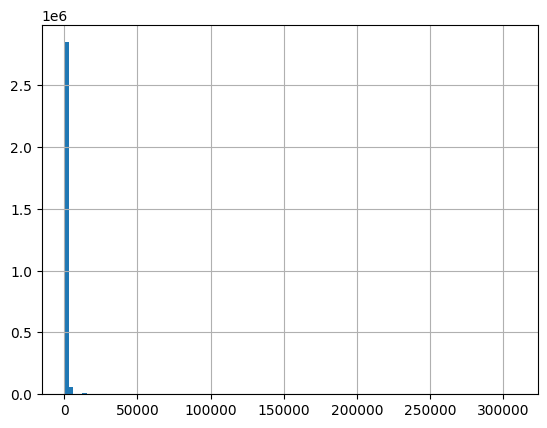

In [29]:
df_all['item_price'].hist(bins = 100)

Выбросом считаются такие наблюдения, для которых значения переменной находятся за пределами интервала $ [Q_1 - 1.5IQR, Q_3 + 1.5IQR]$

In [34]:
q1 = df_all['item_price'].quantile(0.25)
q3 = df_all['item_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print(f"Выбросами будут считаться все продажи, у которых цена находится за пределами интервала [{lower_bound}, {upper_bound}]")

Выбросами будут считаться все продажи, у которых цена находится за пределами интервала [-876.0, 2124.0]


In [36]:
df_all[(df_all['item_price']<=lower_bound)|(df_all['item_price']>=upper_bound)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
37,2013-01-02,0,25,2719,2699.0,1.0,"Darksiders II [PS3, русская версия]",19,Игры - PS3,"Москва ТРК ""Атриум"""
38,2013-01-12,0,25,2719,2699.0,1.0,"Darksiders II [PS3, русская версия]",19,Игры - PS3,"Москва ТРК ""Атриум"""
158,2013-01-03,0,25,2253,2199.0,1.0,"Call Of Duty: Modern Warfare 3 [PS3, русская в...",19,Игры - PS3,"Москва ТРК ""Атриум"""
159,2013-01-18,0,25,2253,2199.0,1.0,"Call Of Duty: Modern Warfare 3 [PS3, русская в...",19,Игры - PS3,"Москва ТРК ""Атриум"""
160,2013-01-26,0,25,2254,2199.0,1.0,"Call Of Duty: Modern Warfare 3 [Xbox 360, русс...",23,Игры - XBOX 360,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2935782,2015-10-30,33,25,7134,3599.0,1.0,"Transformers: Devastation [PS4, английская вер...",20,Игры - PS4,"Москва ТРК ""Атриум"""
2935802,2015-10-19,33,25,7583,2150.0,1.0,WARHAMMER 40000 MINIATURES: Necron Immortals/D...,64,Подарки - Настольные игры,"Москва ТРК ""Атриум"""
2935804,2015-10-29,33,25,7610,2890.0,1.0,WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13,64,Подарки - Настольные игры,"Москва ТРК ""Атриум"""
2935813,2015-10-01,33,25,7640,4040.0,1.0,WARHAMMER MINIATURES: Stormcast Eternals Palad...,64,Подарки - Настольные игры,"Москва ТРК ""Атриум"""


In [37]:
df_all[(df_all['item_price']>=lower_bound)&(df_all['item_price']<=upper_bound)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,2015-10-09,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,2015-10-14,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,2015-10-22,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""


#### Вариант 2: правило 3 сигма

Для нормально распределенной случайной величины интервал значений, в которых попадает около 99.7% наблюдений составляет $\mu \pm 3 \sigma$

Где $\mu$ - это среднее значение случайной величины, а $\sigma$ - это стандартное отклонение

In [38]:
mu = df_all['item_price'].mean()
sigma = df_all['item_price'].std()
lower_bound = mu - 3*sigma
upper_bound = mu + 3*sigma
print(f"Выбросами будут считаться все продажи, у которых цена находится за пределами интервала [{lower_bound}, {upper_bound}]")

Выбросами будут считаться все продажи, у которых цена находится за пределами интервала [-4298.545659439975, 6080.252124835999]


In [39]:
df_all[(df_all['item_price']<=lower_bound)|(df_all['item_price']>=upper_bound)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
1066,2013-01-18,0,25,4861,8490.0,1.0,Microsoft Xbox 360 4GB (RKB-00011),15,Игровые консоли - XBOX 360,"Москва ТРК ""Атриум"""
1203,2013-01-20,0,25,5613,6190.0,1.0,PS3: Гарнитура беспроводная для PS3 (с поддерж...,2,Аксессуары - PS3,"Москва ТРК ""Атриум"""
1701,2013-01-03,0,25,4384,13499.0,1.0,LEGO Майндстормс NXT 2.0,62,"Подарки - Гаджеты, роботы, спорт","Москва ТРК ""Атриум"""
1949,2013-01-05,0,24,5371,8290.0,1.0,Office Home and Business 2010 32-bit/x64 Russi...,75,Программы - Для дома и офиса,"Москва ТК ""Буденовский"" (пав.К7)"
1950,2013-01-24,0,24,5371,7590.0,1.0,Office Home and Business 2010 32-bit/x64 Russi...,75,Программы - Для дома и офиса,"Москва ТК ""Буденовский"" (пав.К7)"
...,...,...,...,...,...,...,...,...,...,...
2935504,2015-10-19,33,25,6674,32990.0,1.0,Sony PlayStation 4 (1Tb) Black (CUH-1208B),12,Игровые консоли - PS4,"Москва ТРК ""Атриум"""
2935654,2015-10-01,33,25,7903,12198.0,1.0,XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...,15,Игровые консоли - XBOX 360,"Москва ТРК ""Атриум"""
2935661,2015-10-07,33,25,7668,7990.0,1.0,WIN HOME 10 32-bit/64-bit Russian Russia Only USB,75,Программы - Для дома и офиса,"Москва ТРК ""Атриум"""
2935662,2015-10-27,33,25,7668,7990.0,1.0,WIN HOME 10 32-bit/64-bit Russian Russia Only USB,75,Программы - Для дома и офиса,"Москва ТРК ""Атриум"""


In [51]:
df_no_outliers = df_all[(df_all['item_price']>=lower_bound)&(df_all['item_price']<=upper_bound)]

In [52]:
mu = df_all['item_cnt_day'].mean()
sigma = df_all['item_cnt_day'].std()
lower_bound = mu - 3*sigma
upper_bound = mu + 3*sigma
print(f"Выбросами будут считаться все продажи, у которых количество находится за пределами интервала [{lower_bound}, {upper_bound}]")

Выбросами будут считаться все продажи, у которых количество находится за пределами интервала [-6.613862407545383, 9.099144177827165]


In [53]:
df_no_outliers = df_no_outliers[(df_no_outliers['item_cnt_day']>=lower_bound)&(df_no_outliers['item_cnt_day']<=upper_bound)]

### Нормализация

Приведение числовой величины к такому масштабу, чтобы минимальное значение соответствовало 0, а максимальное - единице (1)

$$ \tilde{x}_i = \frac{x_i - min}{max - min} $$

In [56]:
df_no_outliers['norm_price'] = (df_no_outliers['item_price'] - df_no_outliers['item_price'].min()) / (df_no_outliers['item_price'].max() - df_no_outliers['item_price'].min()) 

In [57]:
df_all['norm_price'].describe()

count    2.935849e+06
mean     2.895806e-03
std      5.616579e-03
min      0.000000e+00
25%      8.117384e-04
50%      1.298781e-03
75%      3.246954e-03
max      1.000000e+00
Name: norm_price, dtype: float64

<Axes: >

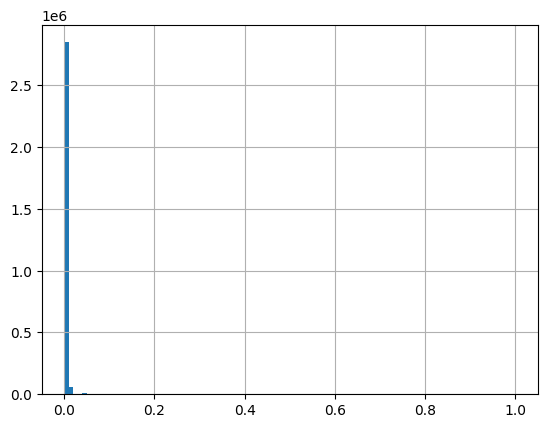

In [58]:
df_all['norm_price'].hist(bins = 100)

<Axes: xlabel='item_cnt_day', ylabel='item_price'>

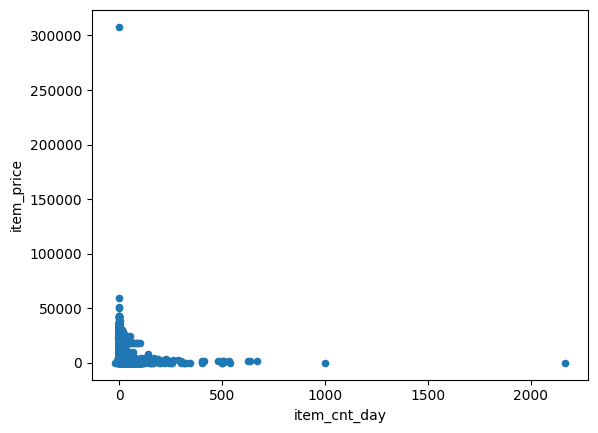

In [60]:
df_all.plot(kind = 'scatter', x = 'item_cnt_day', y = 'item_price')

<Axes: xlabel='item_cnt_day', ylabel='item_price'>

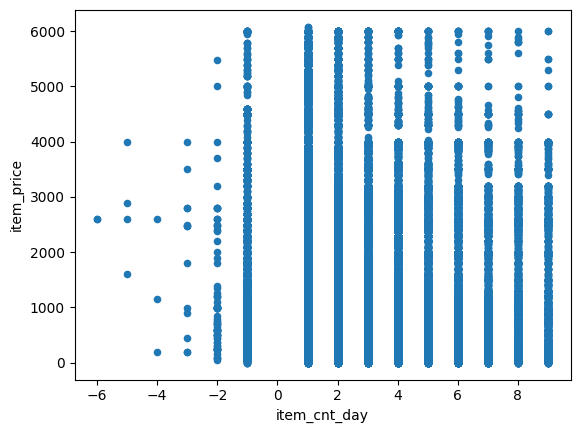

In [54]:
df_no_outliers.plot(kind = 'scatter', x = 'item_cnt_day', y = 'item_price')

In [55]:
df_no_outliers['norm_qty'] = (df_no_outliers['item_cnt_day'] - df_no_outliers['item_cnt_day'].min()) / (df_no_outliers['item_cnt_day'].max() - df_no_outliers['item_cnt_day'].min()) 

<Axes: xlabel='norm_qty', ylabel='norm_price'>

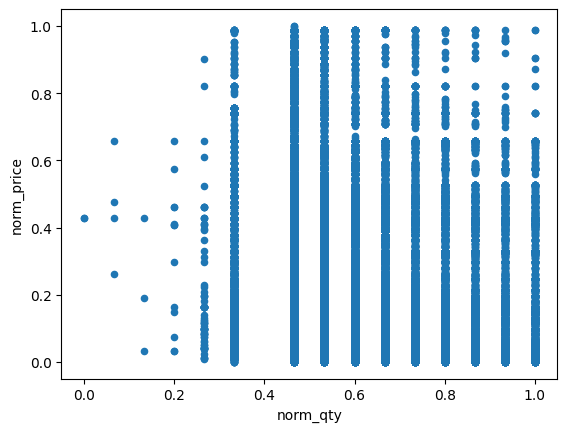

In [61]:
df_no_outliers.plot(kind = 'scatter', x = 'norm_qty', y = 'norm_price')

### Стандартизация

Приведение числовой величины к такому виду, чтобы среднее значение соответствовало нулю, а дисперсия была равна 1

$$ z_i = \frac{x_i - \mu}{\sigma} $$

In [62]:
df_no_outliers['std_price'] = (df_no_outliers['item_price'] - df_no_outliers['item_price'].mean()) / df_no_outliers['item_price'].std()
df_no_outliers['std_qty'] = (df_no_outliers['item_cnt_day'] - df_no_outliers['item_cnt_day'].mean()) / df_no_outliers['item_cnt_day'].std()

<Axes: xlabel='std_qty', ylabel='std_price'>

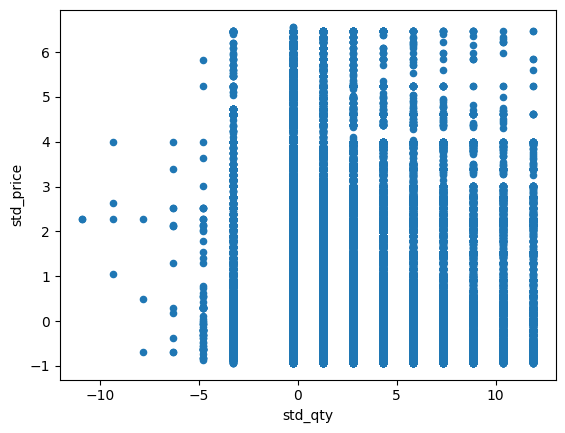

In [63]:
df_no_outliers.plot(kind = 'scatter', x = 'std_qty', y = 'std_price')

<Axes: >

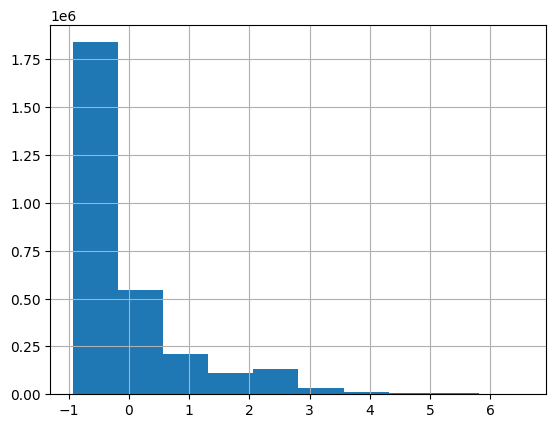

In [64]:
df_no_outliers['std_price'].hist()

<Axes: >

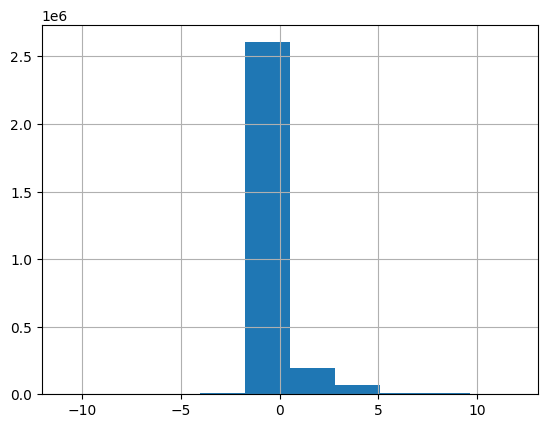

In [65]:
df_no_outliers['std_qty'].hist()